In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import math

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
df = pd.read_csv('prepd-data-20y.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region
0,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
1,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,None,China
2,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,None,China
3,4639,Ao Changrong,M,25.0,173.0,71.0,China,CHN,2008,Summer,Beijing,Hockey,Hockey Men's Hockey,None,China
4,6376,Ba Dexin,M,23.0,185.0,80.0,China,CHN,2014,Winter,Sochi,Curling,Curling Men's Curling,None,China


In [3]:
df = df.loc[df.Year==2016, ['Sex', 'Age', 'Height', 'Weight', 'Team', 'Season', 'City', 'Sport', 'Medal']]
print(df.shape)
cols = list(df.columns)
cols.remove('Medal')
x = df[cols].values
y = df['Medal'].values
print(x[:10])
print(y[:10])

(13656, 9)
[['F' 14.0 168.0 54.0 'China' 'Summer' 'Rio de Janeiro' 'Swimming']
 ['F' 14.0 168.0 54.0 'China' 'Summer' 'Rio de Janeiro' 'Swimming']
 ['M' 30.0 173.0 66.0 'China' 'Summer' 'Rio de Janeiro' 'Triathlon']
 ['F' 22.0 173.0 55.0 'China' 'Summer' 'Rio de Janeiro'
  'Rhythmic Gymnastics']
 ['M' 27.0 183.0 87.0 'China' 'Summer' 'Rio de Janeiro' 'Wrestling']
 ['F' 23.0 182.0 115.0 'China' 'Summer' 'Rio de Janeiro' 'Athletics']
 ['M' 25.0 175.0 55.0 'China' 'Summer' 'Rio de Janeiro' 'Athletics']
 ['F' 24.0 175.0 70.0 'China' 'Summer' 'Rio de Janeiro' 'Archery']
 ['F' 24.0 175.0 70.0 'China' 'Summer' 'Rio de Janeiro' 'Archery']
 ['M' 24.0 180.0 77.0 'China' 'Summer' 'Rio de Janeiro' 'Athletics']]
['None' 'None' 'None' 'None' 'None' 'None' 'Silver' 'None' 'None' 'None']


In [4]:
le_indices = [0, 4, 5, 6, 7]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

# classes = np.unique(y)

ley = LabelEncoder()   
y = ley.fit_transform(y)

print(x_std[:10])
# print(y[:10])

# ley_name_mapping = dict(zip(classes, ley.transform(classes)))
# print(ley_name_mapping)

[[-1.09613658 -2.19505001 -0.70132009 -1.08233807 -0.96639243  0.
   0.          0.91201791]
 [-1.09613658 -2.19505001 -0.70132009 -1.08233807 -0.96639243  0.
   0.          0.91201791]
 [ 0.91229507  0.68084207 -0.26274621 -0.31515645 -0.96639243  0.
   0.          1.51731129]
 [-1.09613658 -0.75710397 -0.26274621 -1.01840626 -0.96639243  0.
   0.          0.40760676]
 [ 0.91229507  0.14161231  0.61440154  1.02741139 -0.96639243  0.
   0.          1.92084021]
 [-1.09613658 -0.57736071  0.52668677  2.81750183 -0.96639243  0.
   0.         -1.30739115]
 [ 0.91229507 -0.2178742  -0.08731666 -1.01840626 -0.96639243  0.
   0.         -1.30739115]
 [-1.09613658 -0.39761746 -0.08731666 -0.05942924 -0.96639243  0.
   0.         -1.40827338]
 [-1.09613658 -0.39761746 -0.08731666 -0.05942924 -0.96639243  0.
   0.         -1.40827338]
 [ 0.91229507 -0.39761746  0.35125722  0.38809337 -0.96639243  0.
   0.         -1.30739115]]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from xgboost import XGBClassifier

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Explained variance:
 [2.27595766 1.07068315 0.99739038 0.90626537 0.53475699 0.21538585
 0.         0.        ]
Cummulative variance:
 [2.27595766 3.34664081 4.34403118 5.25029656 5.78505355 6.0004394
 6.0004394  6.0004394 ]


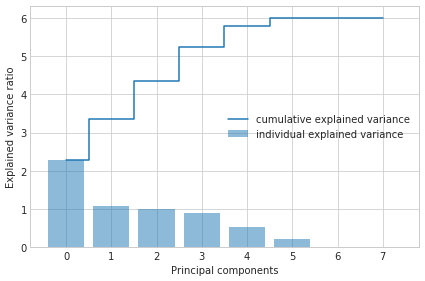

In [6]:
pca = PCA(n_components=8)
pca.fit_transform(x_std)

var_exp = pca.explained_variance_
print('Explained variance:\n', var_exp)
cum_var_exp = np.cumsum(var_exp)
print('Cummulative variance:\n', cum_var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(8), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(8), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [7]:
mat = []

for ncomp in range(1,9):
    pca = PCA(n_components=ncomp)
    x_trans = pca.fit_transform(x_std)
    x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size=0.3, random_state=0)
    model = XGBClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = round(accuracy, 3)
    mat.append([ncomp, accuracy])

data = pd.DataFrame(mat, columns=['No. of components', 'Accuracy (of XGBoost)'])
data.head(9)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

,No. of components,Accuracy (of XGBoost)
0,1,0.857
1,2,0.857
2,3,0.857
3,4,0.857
4,5,0.858
5,6,0.858
6,7,0.858
7,8,0.858


In [8]:
mat = []

for ncomp in range(1,9):
    x = []
    for gamma in [1,5,10]:
        kpca = KernelPCA(n_components=ncomp, kernel='rbf', gamma=gamma)
#         print('trained for comp: {}, gamma: {}.'.format(ncomp, gamma))
        x_trans = kpca.fit_transform(x_std)
        x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size=0.3, random_state=0)
#         print('train test split done.')
        model = XGBClassifier()
#         print('fitting xgb classifier')
        model.fit(x_train, y_train)
#         print('predicting values')
        y_pred = model.predict(x_test)
#         print('getting accuracy score')
        accuracy = accuracy_score(y_test, y_pred)
        accuracy = round(accuracy, 3)
        x.append(accuracy)
    mat.append([ncomp] + x)

cols = ['No. of components'] + ['Gamma:{}'.format(i) for i in [1,5,10]]
data = pd.DataFrame(mat, columns=cols)
data.set_index('No. of components', inplace=True)
data.head(15)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

,Gamma:1,Gamma:5,Gamma:10
No. of components,,,
1,0.857,0.857,0.857
2,0.857,0.857,0.857
3,0.857,0.857,0.857
4,0.857,0.857,0.857
5,0.857,0.857,0.857
6,0.857,0.857,0.857
7,0.857,0.857,0.857
8,0.857,0.857,0.857


In [9]:
mat = []

for ncomp in range(1,9):
    x = []
    for gamma in [1,5,10]:
        kpca = KernelPCA(n_components=ncomp, kernel='sigmoid', gamma=gamma)
        x_trans = kpca.fit_transform(x_std)
        x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size=0.3, random_state=0)
        model = XGBClassifier()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy = round(accuracy, 3)
        x.append(accuracy)
    mat.append([ncomp] + x)

cols = ['No. of components'] + ['Gamma:{}'.format(i) for i in [1,5,10]]
data = pd.DataFrame(mat, columns=cols)
data.set_index('No. of components', inplace=True)
data.head(15)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

,Gamma:1,Gamma:5,Gamma:10
No. of components,,,
1,0.857,0.857,0.857
2,0.857,0.857,0.857
3,0.857,0.857,0.857
4,0.857,0.857,0.857
5,0.857,0.858,0.857
6,0.858,0.858,0.858
7,0.858,0.857,0.858
8,0.858,0.857,0.857


In [10]:
mat = []

for ncomp in range(1,9):
    x = []
    for gamma in [1,5,10]:
        kpca = KernelPCA(n_components=ncomp, kernel='poly', gamma=gamma)
        x_trans = kpca.fit_transform(x_std)
        x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size=0.3, random_state=0)
        model = XGBClassifier()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy = round(accuracy, 3)
        x.append(accuracy)
    mat.append([ncomp] + x)

cols = ['No. of components'] + ['Gamma:{}'.format(i) for i in [1,5,10]]
data = pd.DataFrame(mat, columns=cols)
data.set_index('No. of components', inplace=True)
data.head(15)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

,Gamma:1,Gamma:5,Gamma:10
No. of components,,,
1,0.857,0.857,0.857
2,0.857,0.856,0.856
3,0.857,0.857,0.857
4,0.857,0.857,0.857
5,0.857,0.857,0.857
6,0.857,0.857,0.857
7,0.857,0.857,0.857
8,0.857,0.857,0.857


In [11]:
mat = []

for ncomp in range(1,9):
    x = []
    for gamma in [1,5,10]:
        kpca = KernelPCA(n_components=ncomp, kernel='cosine', gamma=gamma)
        x_trans = kpca.fit_transform(x_std)
        x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size=0.3, random_state=0)
        model = XGBClassifier()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy = round(accuracy, 3)
        x.append(accuracy)
    mat.append([ncomp] + x)

cols = ['No. of components'] + ['Gamma:{}'.format(i) for i in [1,5,10]]
data = pd.DataFrame(mat, columns=cols)
data.set_index('No. of components', inplace=True)
data.head(15)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

,Gamma:1,Gamma:5,Gamma:10
No. of components,,,
1,0.857,0.857,0.857
2,0.857,0.857,0.857
3,0.857,0.857,0.857
4,0.857,0.857,0.857
5,0.857,0.857,0.857
6,0.857,0.857,0.857
7,0.858,0.857,0.857
8,0.857,0.858,0.857
